In [1]:
import pandas as pd
import numpy as np
import biosppy
import biosppy.signals 
import scipy
from sklearn.metrics import mean_squared_error


In [2]:
import matplotlib.pyplot as plt

In [3]:
grp = pd.read_excel('C:\\Users\\YOGHES WARAN\\OneDrive\\Desktop\\New folder\\part1_ppg.xlsx');
grp1 = pd.read_excel('C:\\Users\\YOGHES WARAN\\OneDrive\\Desktop\\New folder\\part2.xlsx');
grp2= pd.read_excel('C:\\Users\\YOGHES WARAN\\OneDrive\\Desktop\\New folder\\part4.xlsx');


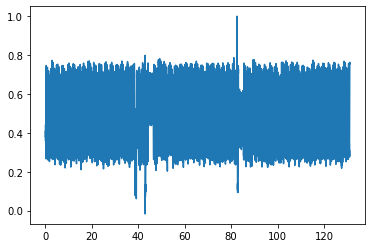

In [8]:
no=np.array(grp['time'])

n=0.09*np.cos(30*2*np.pi*no)
p=np.array(grp['ppg'])+n
p=p/max(p)

plt.plot(grp['time'],p)

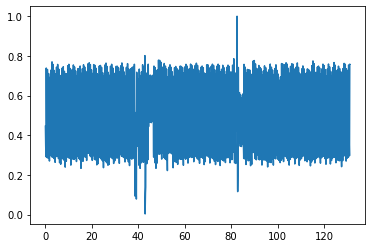

In [5]:

plt.plot(grp['time'],grp['ppg']/max(grp['ppg']))


In [6]:
a=np.array(grp['ppg']/max(grp['ppg']))
peak=biosppy.signals.ecg.christov_segmenter(signal=a, sampling_rate=125)
peak1=biosppy.signals.ecg.christov_segmenter(signal=p, sampling_rate=125)

In [7]:
print(peak)
print(peak1)

ReturnTuple(rpeaks=array([  45,  107,  170,  231,  292,  355,  416,  477,  597,  659,  720,
        780,  839,  957, 1020, 1081, 1141, 1201, 1319, 1381, 1444, 1505,
       1566, 1626, 1685, 1868, 1930, 1990, 2052, 2113, 2174, 2234, 2417,
       2478, 2538, 2598, 2659, 2777, 2839, 2900, 2960, 3020, 3077, 3140,
       3200, 3261, 3322, 3443, 3501, 3563, 3625, 3689, 3749, 3811, 3872,
       3933, 3994, 4174, 4238, 4299, 4359, 4421, 4482, 4543, 4661, 4723,
       4785, 4848, 4908, 5000, 5356, 9642]))
ReturnTuple(rpeaks=array([  45,  107,  170,  232,  291,  353,  416,  478,  537,  595,  657,
        720,  778,  841,  958, 1020, 1082, 1141, 1203, 1320, 1382, 1445,
       1503, 1566, 1628, 1682, 1807, 1866, 1928, 1991, 2053, 2112, 2174,
       2237, 2353, 2416, 2478, 2537, 2599, 2662, 2778, 2841, 2899, 2962,
       3020, 3078, 3141, 3199, 3262, 3320, 3445, 3499, 3561, 3624, 3687,
       3749, 3812, 3870, 3932, 3995, 4111, 4174, 4237, 4299, 4357, 4420,
       4482, 4541, 4662, 4724, 4787, 4844

In [8]:
q=grp['ppg']/max(grp['ppg'])
sliced_signal=[]
for i in range(0,len(peak1[0])-2):
    k=[];
    for j in range(peak[0][i],peak1[0][i+2]):
     k.append(q[j]) 
    sliced_signal.append(k)
print(len(sliced_signal[2]))
print(len(sliced_signal))

274
19


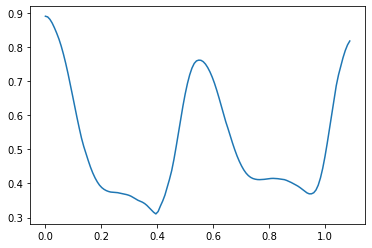

In [9]:

t=np.linspace(0,0.008*len(sliced_signal[0]) ,len(sliced_signal[0]))
plt.plot(t,sliced_signal[0])

[[0.         0.01856583 0.00256548 0.0029987  0.00379206 0.03164643
  0.00339247 0.00272936 0.00192292 0.00171553 0.04343564 0.00488545
  0.00526538 0.0017913  0.00193588 0.00326246 0.01074639 0.00138025
  0.02812464]
 [0.01856583 0.         0.01784747 0.02100512 0.01685878 0.00610728
  0.01866113 0.01764778 0.01817943 0.02025744 0.0099709  0.02939421
  0.00956875 0.02869237 0.02007826 0.0180514  0.00551237 0.01809139
  0.00284525]
 [0.00256548 0.01784747 0.         0.00592959 0.00308229 0.02823539
  0.00221539 0.00503406 0.0006832  0.00273556 0.04432823 0.00553808
  0.00473038 0.00282381 0.00188336 0.00491021 0.00852999 0.00138991
  0.02773372]
 [0.0029987  0.02100512 0.00592959 0.         0.00523362 0.04069986
  0.00374701 0.00075357 0.00484182 0.00112574 0.04618369 0.00578165
  0.01104053 0.00442692 0.00187832 0.00209743 0.01637248 0.00343361
  0.0323393 ]
 [0.00379206 0.01685878 0.00308229 0.00523362 0.         0.03095787
  0.00554426 0.00249784 0.00253095 0.00404489 0.04401442 0.0

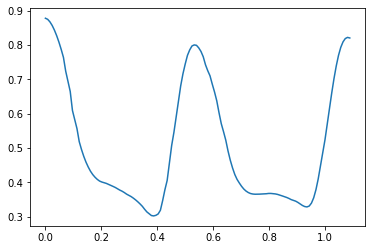

In [10]:
k=[] 
for i in range(0,len(sliced_signal)):
 k.append(len(sliced_signal[i]))
m=min(k)      
        
y=[]
for i in range(0,len(sliced_signal)):
  k=[]
  for j in range(i,i+1):
        k=sliced_signal[i][:m]
  y.append(k)
sliced_signal=y

n=len(sliced_signal)
error=np.zeros((n,n))

for i in range(0,len(sliced_signal)):
    for j in range(i+1,len(sliced_signal)):
     k=mean_squared_error(sliced_signal[i],sliced_signal[j])      
     error[i][j]=k
     error[j][i]=k   
      
print(error)    

mean_error=0
for i in range(0,len(sliced_signal)):
    for j in range(0,len(sliced_signal)):
        if i!=j :
            mean_error=mean_error+error[i][j]
n=len(sliced_signal)
n=n*n-n
mean_error=mean_error/n
print(mean_error)


t=np.linspace(0,0.008*m ,m)
plt.plot(t,sliced_signal[13])

In [15]:
n=len(sliced_signal)
track=np.zeros((n))
for i in range(0,len(sliced_signal)):
    f=1
    for j in range(0,len(sliced_signal)):
            if error[i][j]<mean_error :
              f=f+1     
    track[i]=f
track_mean=np.sum(track)/len(track)
i1=0
for i in range(0,n):
    if(track[i]>track_mean):
      i1=i1+1
y=np.zeros((i1,m))
cluster=np.zeros((i1,m))
i1=0
print(i1)
for i in range(0,len(sliced_signal)):
    f=1
    if(track[i]>track_mean):
      for k in range(0,m):
                y[i1][k]=y[i1][k]+sliced_signal[i][k]
      f=f+1
      i1=i1+1
    y[i1-1]=y[i1-1]/f
    
cluster=y
print(len(cluster))

0
15


In [27]:
i=len(cluster)
y=cluster
y=y.reshape(m*i,1)
y=y/np.max(y)
np.shape(y)

(2040, 1)

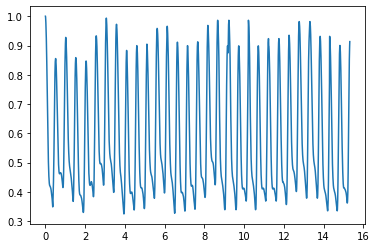

In [28]:
t=np.linspace(0,0.008*m*len(cluster)-1,m*len(cluster))
plt.plot(t,y) 
